# Sentiment Analysis of Customer Reviews
Sentiment analysis of review text enables deeper understanding of customer behavior and expectations.
While ratings provide a quantitative measure of customer satisfaction, they do not capture the underlying reasons behind opinions. 

## Text preprocessing and Normalization
- Cleaning the review_text column which contains the reviews from users by removing the repeating words, Tokenizing, removing stop words and lemmatizing

In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..")))

# loading the preprocessed data 
from src.data_preprocessing import load_processedDfs
from src.sentiment import remove_repLetter,clean_title

df = load_processedDfs()

# removing repetitive words from text
df['normal_text'] = df['review_text'].apply(remove_repLetter)

# Lemmetizing and tokenizing the review text column
df['clean_text'] = df['normal_text'].apply(clean_title)

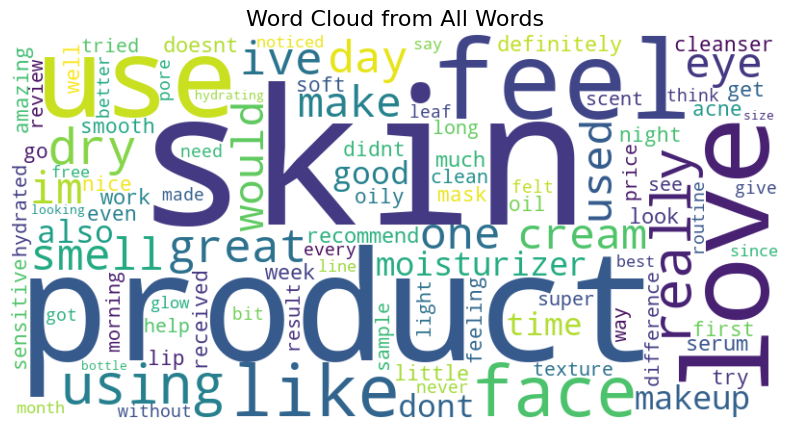

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from src.sentiment import wordCounter

# loading the word counts
words_count = wordCounter(df)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='viridis'
).generate_from_frequencies(words_count)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from All Words", fontsize=16)
plt.show()

Analysis: After cleaning the review text we can observe more frequency of words like skin, product, face, love, etc. showing people inclination towards skin products more.

## Sentiment Scoring using VADER
To quantify customer opinions in review text, I applied sentiment analysis using VADER(Valence Aware Dictionary and sEntiment Reasoner). VADER is a lexicon and rule based method designed for short, informal text such as customer reviews and it accounts for linguistic cues including negation, intensity and emphasis.
This approach allows us to derive sentiment directly from review text and subsequently validate it against user-provided ratings.

In [64]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['clean_text'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df['sentiment_label'] = df['sentiment_score'].apply(lambda x:'positive' if x>=0.05 else('negative' if x<=-0.05 else 'neutral'))

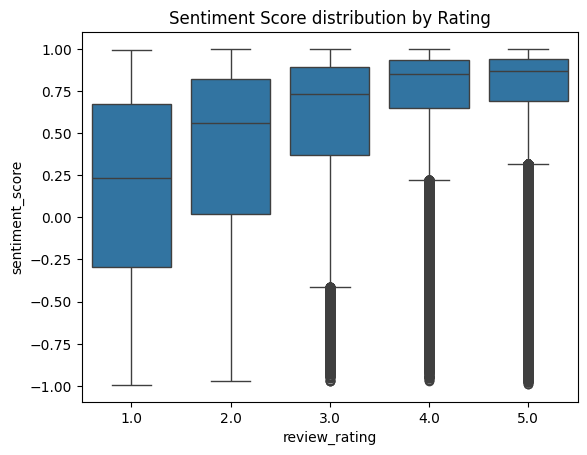

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='review_rating',y='sentiment_score',data=df)
plt.title('Sentiment Score distribution by Rating')
plt.show()

Analysis: The boxplot clearly reveals a clear upward shift in sentiment scores as ratings increase. Reviews with 1 rating shows high spread of scores indicating strong language in order to explain what went wrong or what can be improved. As ratings increases the sentiment distribution becomes progressively more positive and more concenterated with higher rating.